In [1]:
from scipy.stats import poisson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

Text(0, 0.5, 'Possion pmf (lambda = 100)')

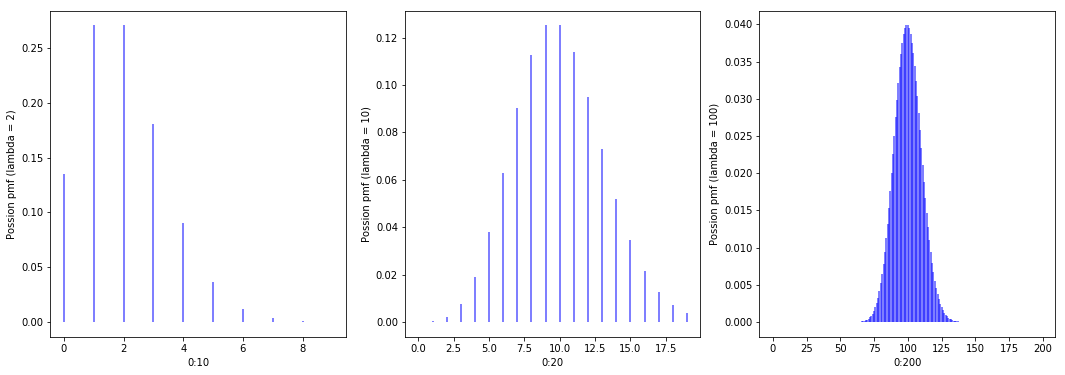

In [2]:
fig, ax = plt.subplots(1, 3,figsize=(18, 6))
ax[0].vlines(range(0,10), 0, poisson.pmf(range(0,10), 2), colors='b', lw=2, alpha=0.5)
ax[0].set_xlabel('0:10')
ax[0].set_ylabel('Possion pmf (lambda = 2)')

ax[1].vlines(range(0,20), 0, poisson.pmf(range(0,20), 10), colors='b', lw=2, alpha=0.5)
ax[1].set_xlabel('0:20')
ax[1].set_ylabel('Possion pmf (lambda = 10)')

ax[2].vlines(range(0,200), 0, poisson.pmf(range(0,200), 100), colors='b', lw=2, alpha=0.5)
ax[2].set_xlabel('0:200')
ax[2].set_ylabel('Possion pmf (lambda = 100)')

In [3]:
x = range(0,10000)
lamb = 3
mu = sum(x * poisson.pmf(x, lamb))
sigmasq = sum((x - mu) ** 2 * poisson.pmf(x, lamb))
print(int(round(mu)), int(round(sigmasq)))

3 3


## gaData

In [4]:
gaData = pd.read_csv('../data/gaData.csv').drop('Unnamed: 0', axis=1)

In [5]:
gaData.head(5)

,date,visits,simplystats,julian
0,2011-01-01,0,0,14975
1,2011-01-02,0,0,14976
2,2011-01-03,0,0,14977
3,2011-01-04,0,0,14978
4,2011-01-05,0,0,14979


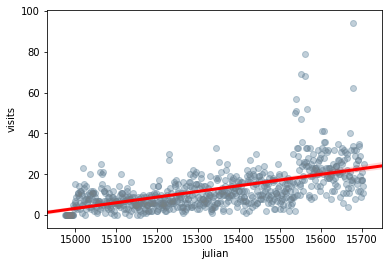

In [6]:
plt.scatter(gaData['julian'], gaData['visits'], alpha=0.2)
plt.xlabel('julian')
plt.ylabel('Visits')
sns.regplot(
    x='julian', 
    y='visits', 
    data=gaData, 
    scatter_kws={'alpha': 0.2, 'color': 'gray'},
    line_kws = {'color': 'red', 'linewidth': 3}
)

## OLS on Log Visits

In [7]:
gaData['log_visits'] = np.log(gaData['visits'] + 1)

In [8]:
ols_model = smf.ols(formula='log_visits ~ julian', data=gaData).fit()
round(np.exp(ols_model.params), 4)

Intercept    0.0000
julian       1.0023
dtype: float64

## Visualize poisson regression

In [9]:
glm_1 = smf.glm('visits ~ julian', data=gaData, family=sm.families.Poisson()).fit()

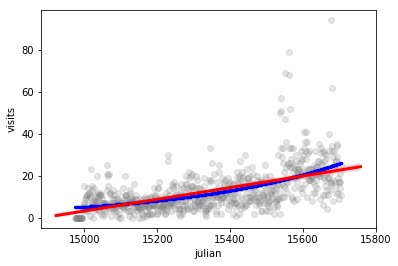

In [10]:
plt.xlabel('julian')
plt.ylabel('Visits')
sns.regplot(
    x='julian', 
    y='visits', 
    data=gaData, 
    scatter_kws={'alpha': 0.2, 'color': 'gray'},
    line_kws={'color':'red', 'linewidth': 3}
)
plt.scatter(x=gaData['julian'], y=glm_1.fittedvalues, color='blue', s=5)

## Visualize residuals

Text(0, 0.5, 'Residuals')

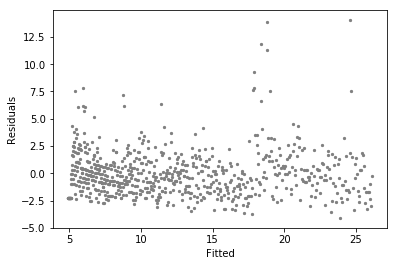

In [11]:
plt.scatter(y=glm_1.resid_pearson, x=glm_1.fittedvalues, color='gray', s=5)
plt.xlabel('Fitted')
plt.ylabel('Residuals')

In [12]:
glm_1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-32.7498,0.813,-40.284,0.000,-34.343,-31.156
julian,0.0023,5.27e-05,43.547,0.000,0.002,0.002


## Fitting rates 

In [13]:
glm_2 = smf.glm('simplystats ~ julian', 
                 data=gaData, 
                 offset=np.log(gaData.visits + 1),
                 family=sm.families.Poisson()).fit()

Text(0, 0.5, 'Fitted Counts')

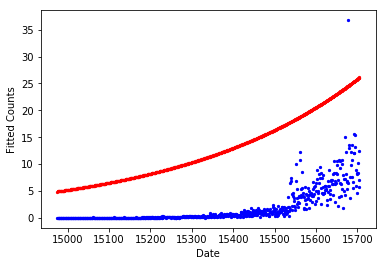

In [14]:
plt.scatter(x=gaData['julian'], y=glm_2.fittedvalues, color='blue', s=5)
plt.scatter(x=gaData['julian'], y=glm_1.fittedvalues, color='red', s=5)
plt.xlabel('Date')
plt.ylabel('Fitted Counts')

In [15]:
glm_2.params

Intercept   -124.501826
julian         0.007881
dtype: float64

Text(0, 0.5, 'Fitted Counts')

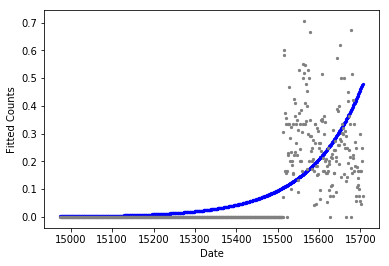

In [16]:
plt.scatter(x=gaData['julian'], y=glm_2.fittedvalues / (gaData['visits'] + 1), color='blue', s=5)
plt.scatter(x=gaData['julian'], y=gaData['simplystats'] / (gaData['visits'] + 1), color='gray', s=5)

plt.xlabel('Date')
plt.ylabel('Fitted Counts')